In [1]:
from google.colab import files
uploaded = files.upload()



Saving earthquakes.csv to earthquakes.csv


In [2]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
!pip install astral
import datetime
from astral import LocationInfo
from astral.sun import sun
import pytz

data = pd.read_csv(io.BytesIO(uploaded['earthquakes.csv']))




(3825, 22)

In [0]:
data['time'] = pd.to_datetime(data.time)
pst = pytz.timezone('US/Pacific')


def is_daylight(x):
  loc = LocationInfo(latitude=x.latitude, longitude=x.longitude, timezone='US/Pacific')
  #loc = LocationInfo(36.7, -121.2, timezone='US/Pacific')
  
  
  shakedate = x.time.date() 
  sunup = sun(loc.observer, date=shakedate)['sunrise']
  sundown = sun(loc.observer, date=shakedate)['sunset']
  
  
  if sunup.astimezone(pst).time() < x.time.time() < sundown.astimezone(pst).time(): 
     return 'yes'
  else:
    return'no'

data['daylight'] = data.apply(is_daylight, axis=1)






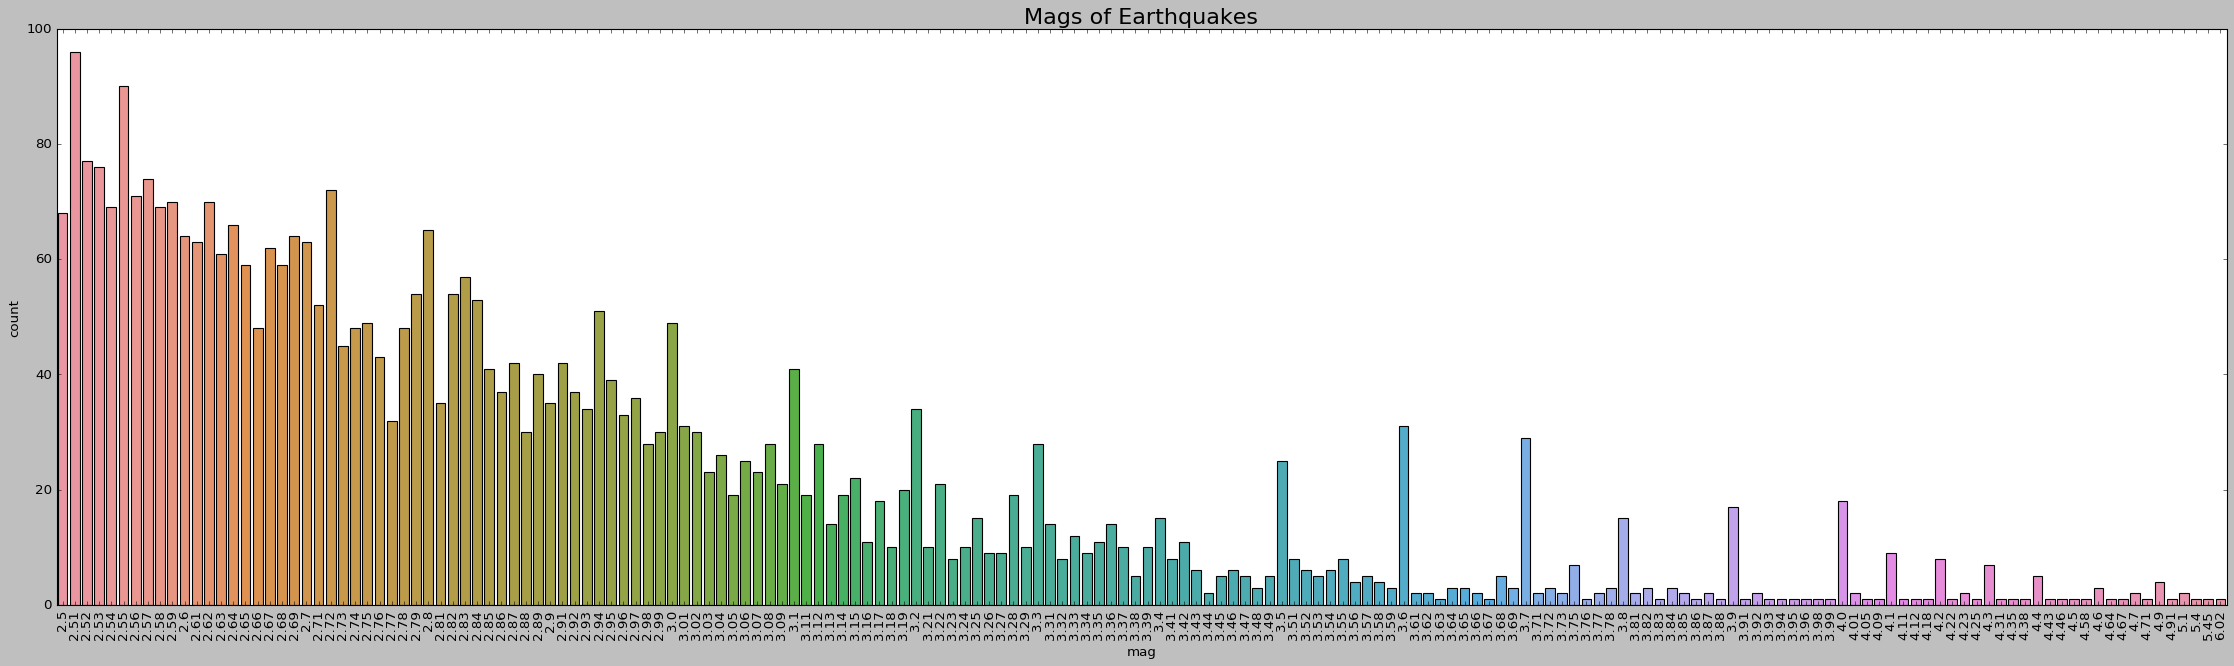

In [44]:
plt.rcParams['figure.figsize']=(35,9)
plt.style.use('fast')
sns.countplot(data['mag'] )
plt.title('Mags of Earthquakes', fontweight=30, fontsize=20)
plt.xticks(rotation = 90)
plt.show()



In [39]:
print(plt.style.available)

['fivethirtyeight', 'seaborn-ticks', 'dark_background', 'seaborn-bright', 'seaborn-dark', 'grayscale', 'bmh', 'seaborn-dark-palette', 'seaborn', 'classic', 'seaborn-talk', 'seaborn-pastel', 'ggplot', 'seaborn-deep', 'seaborn-darkgrid', 'tableau-colorblind10', 'Solarize_Light2', 'seaborn-poster', 'fast', 'seaborn-paper', 'seaborn-muted', 'seaborn-whitegrid', '_classic_test', 'seaborn-white', 'seaborn-notebook', 'seaborn-colorblind']


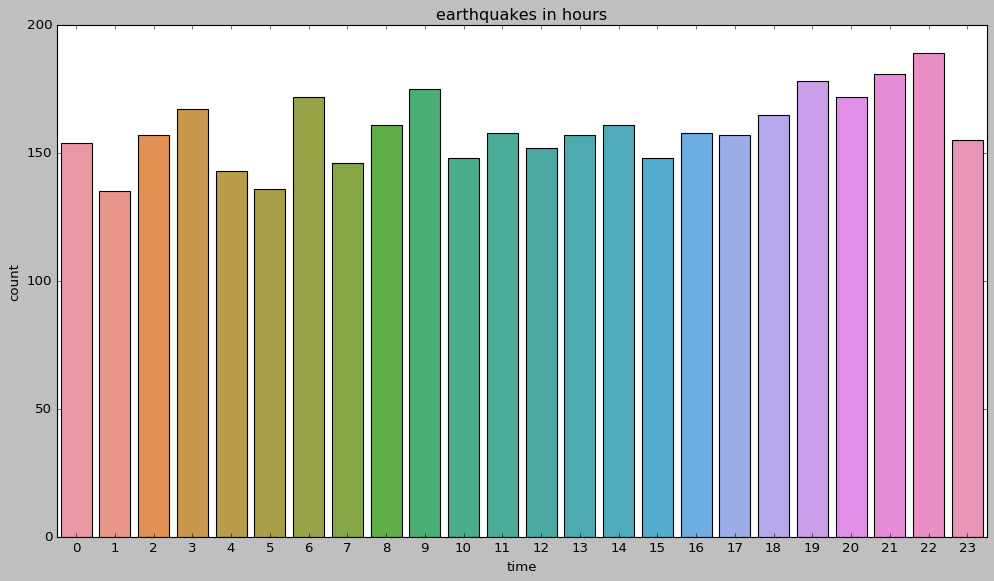

In [45]:
time = pd.to_datetime(data.time)

data['time'] = pd.to_datetime(data.time)

plt.rcParams['figure.figsize']=(15,8)


sns.countplot(data['time'].dt.hour)
plt.title('earthquakes in hours')
plt.show()



In [22]:
data['round_mag']=round(data['mag'])
data.head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,daylight,round_mag
0,2020-02-15 09:32:03.830000+00:00,36.687833,-121.287833,7.13,2.78,md,57.0,40.0,0.02891,0.14,nc,nc73341310,2020-02-16T02:44:02.027Z,"12km SSE of Tres Pinos, CA",earthquake,0.20,0.43,0.156,50.0,reviewed,nc,nc,yes,3.0
1,2020-02-13 03:33:42.050000+00:00,36.688833,-121.282667,8.55,3.69,mw,72.0,44.0,0.02505,0.11,nc,nc73340375,2020-02-16T07:08:22.188Z,"12km SSE of Tres Pinos, CA",earthquake,0.14,0.34,NaN,4.0,reviewed,nc,nc,no,4.0
2,2020-01-31 11:13:51.030000+00:00,37.249000,-122.157833,11.64,2.65,md,100.0,73.0,0.05401,0.13,nc,nc73334056,2020-02-11T02:29:57.620Z,"12km W of Saratoga, CA",earthquake,0.13,0.25,0.172,111.0,reviewed,nc,nc,yes,3.0
3,2020-01-30 17:07:34.940000+00:00,36.700167,-121.330833,3.74,2.80,md,57.0,63.0,0.05790,0.09,nc,nc73333836,2020-02-11T00:41:31.840Z,"10km S of Tres Pinos, CA",earthquake,0.16,0.84,0.189,76.0,reviewed,nc,nc,yes,3.0
4,2020-01-15 07:00:37.860000+00:00,37.942333,-122.313333,6.70,2.62,md,112.0,23.0,0.01385,0.08,nc,nc73327671,2020-02-14T15:06:17.522Z,"0km S of East Richmond Heights, CA",earthquake,0.09,0.13,0.166,117.0,reviewed,nc,nc,no,3.0


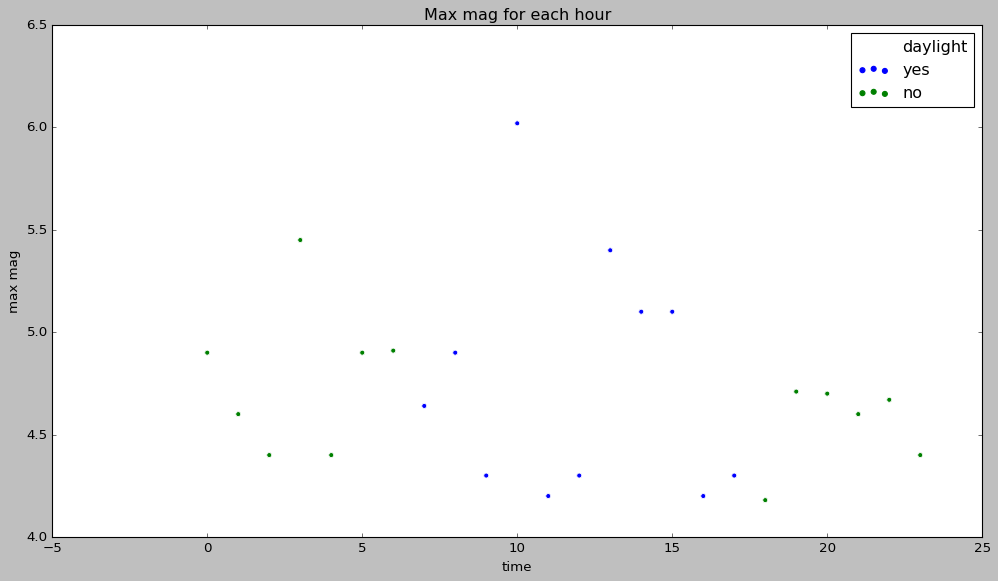

In [46]:
max_mag = [data[data['time'].dt.hour == i].mag.max() for i in data.time.dt.hour]

sns.scatterplot(data.time.dt.hour, max_mag, hue=data.daylight)
plt.title('Max mag for each hour')
plt.xlabel('time')
plt.ylabel('max mag')
plt.show()


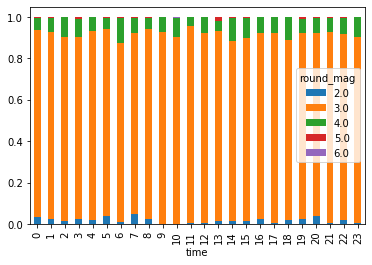

In [24]:
df=pd.crosstab(data.time.dt.hour, data['round_mag'])
df.div(df.sum(1).astype(float), axis = 0).plot.bar(stacked=True)
plt.xticks(rotation=90)
plt.show()



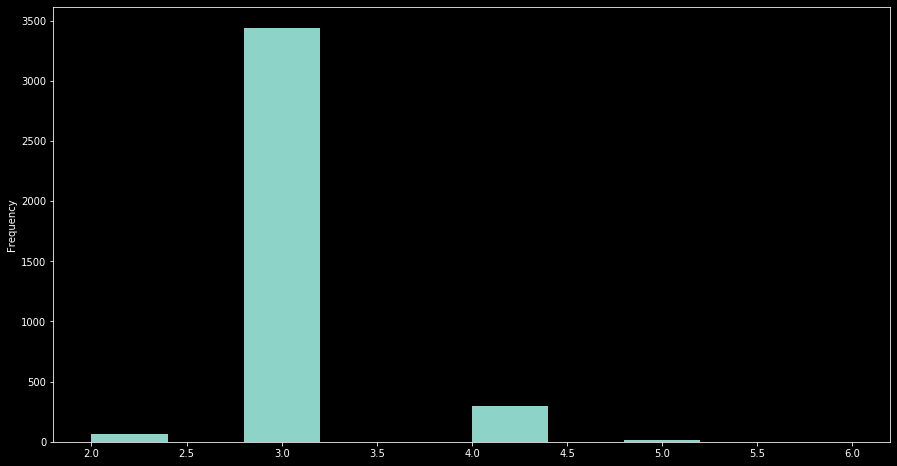

In [31]:
data.round_mag.plot(kind='hist')


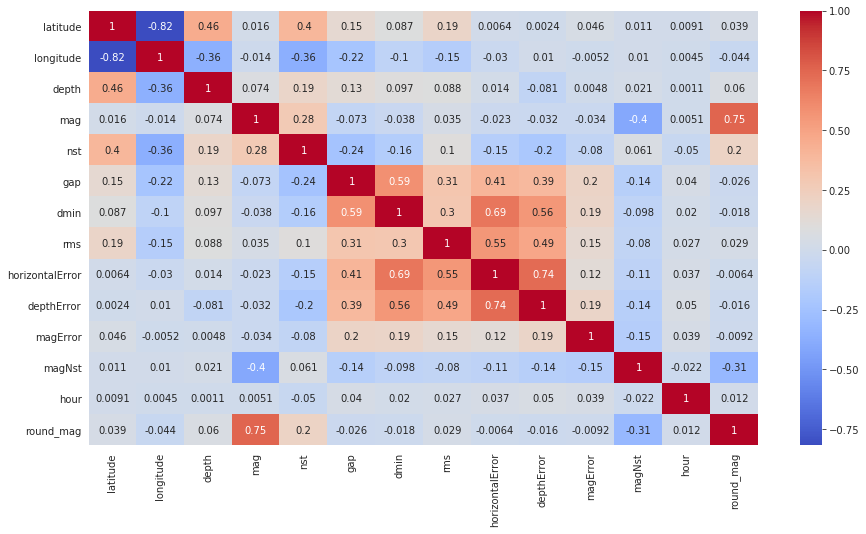

In [0]:
sns.set_style('white')
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


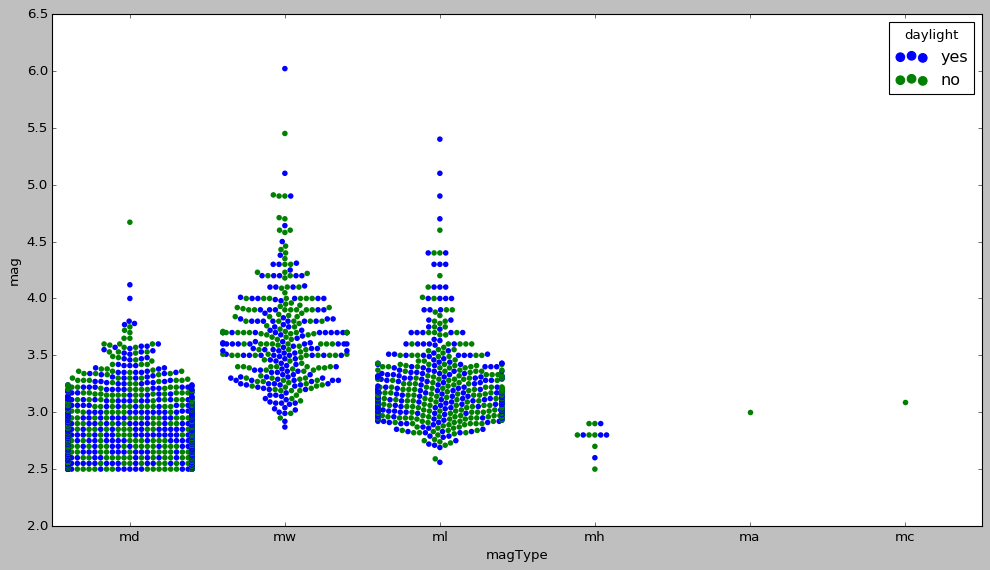

In [47]:
#categorical plot
sns.swarmplot(x=data['magType'],
              y=data['mag'], hue=data.daylight)

In [20]:
data.daylight.value_counts()

no     1919
yes    1906
Name: daylight, dtype: int64

In [36]:
import folium
folium.Map(location=[37.7, -122.4], width=700, height=700)